In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train = pd.read_csv(r"../data/X_train.csv")
X_test = pd.read_csv(r"../data/X_test.csv")
y_train = pd.read_csv(r"../data/y_train.csv")
y_test = pd.read_csv(r"../data/y_test.csv")

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59954, 92), (59954, 1), (14989, 92), (14989, 1))

c:\Users\aman2\OneDrive\Desktop\Git repo\CADCS---Charging-Time-Prediction-for-Battery-Electric-Vehicles-BEVs-using-Time-Series-Methods\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0057 - val_loss: 0.0017
Epoch 2/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 8.9067e-04 - val_loss: 7.9438e-04
Epoch 7/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 7.1635e-04 - val_loss: 7.3871e-04
Epoch 8/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 5.9771e-04 - val_loss: 5.4768e-04
Epoch 9/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 4.8741e-04 - val_loss: 4.6989e-04
Epoch 10/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 4.1584e-04 - val_loss: 5.4305e-04
Epoch 11/30
1687/1687 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 3.4179e-04 

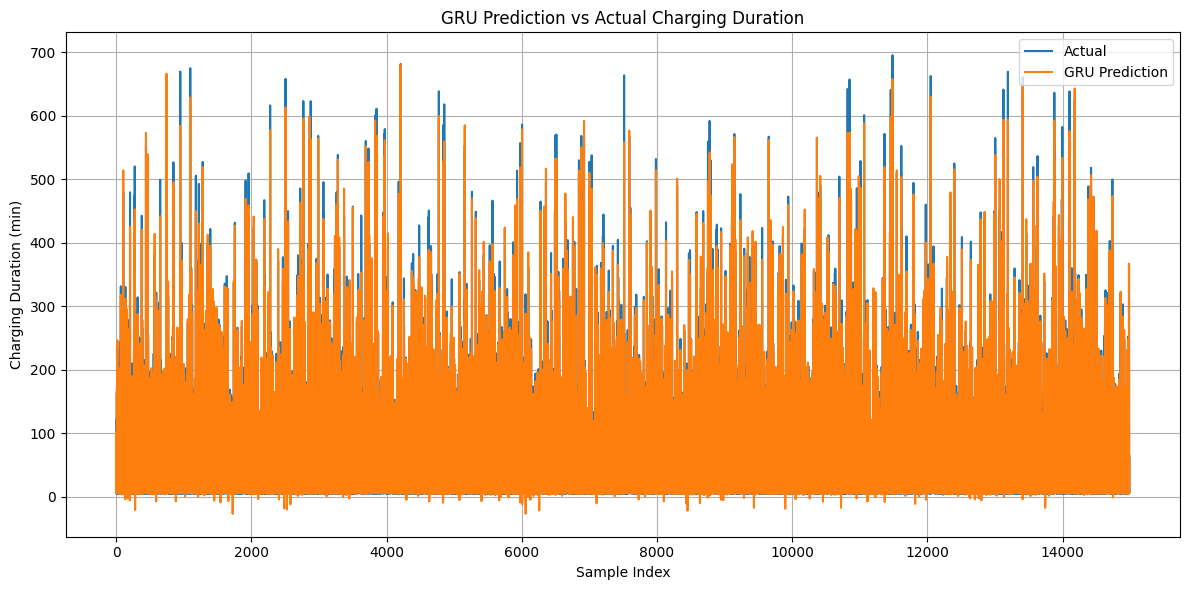

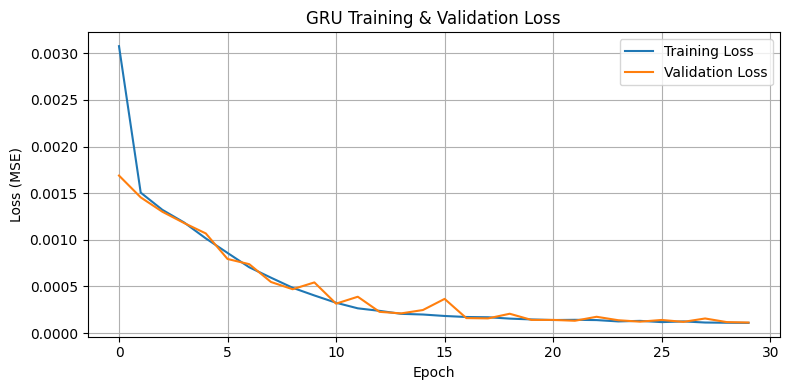

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.losses import MeanSquaredError

# === Load data ===
X_train = pd.read_csv(r"../data/X_train.csv")
X_test = pd.read_csv(r"../data/X_test.csv")
y_train = pd.read_csv(r"../data/y_train.csv")
y_test = pd.read_csv(r"../data/y_test.csv")

# === Scale features ===
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# === Reshape for GRU (samples, timesteps, features) ===
X_train_gru = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_gru = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# === Build GRU model ===
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2]), return_sequences=False))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss=MeanSquaredError())

# === Train model ===
history_gru = model_gru.fit(X_train_gru, y_train_scaled, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# === Predict and inverse scale ===
y_pred_gru_scaled = model_gru.predict(X_test_gru)
y_pred_gru = scaler_y.inverse_transform(y_pred_gru_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

# === Evaluate ===
mse_gru = mean_squared_error(y_test_inv, y_pred_gru)
mae_gru = mean_absolute_error(y_test_inv, y_pred_gru)
r2_gru = r2_score(y_test_inv, y_pred_gru)

print("\n--- GRU Model Performance ---")
print(f"MSE: {mse_gru:.2f}")
print(f"MAE: {mae_gru:.2f}")
print(f"R² Score: {r2_gru:.2f}")

# === Plot Actual vs Predicted ===
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Charging Duration (min)')
plt.title('GRU Prediction vs Actual Charging Duration')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Optional: Plot training loss over epochs ===
plt.figure(figsize=(8,4))
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title("GRU Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
